In [1]:
#Import Required Libraries   STEP - 1
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
#Load the Dataset   STEP - 2
data = pd.read_csv('TCS_stock_history.csv') # Replace with the correct path to your dataset

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
#  Data Preprocessing  STEP - 3

# ● Check for null values and handle them.
# ● Convert necessary columns to numeric if needed.
# ● Check for any outliers in the data, especially in Volume and Close price.

In [5]:
# Check for null values
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [6]:
# Convert numeric columns if required

data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

In [7]:
# Fill any remaining NaN values
data.fillna(method='ffill', inplace=True)

In [8]:
# Exploratory Data Analysis (EDA)    STEP - 4
# ● Price Trends: Visualize the Open, Close, High, and Low prices over time.
# ● Volume Analysis: Analyze trading volumes.
# ● Moving Averages: Calculate moving averages for trend analysis.

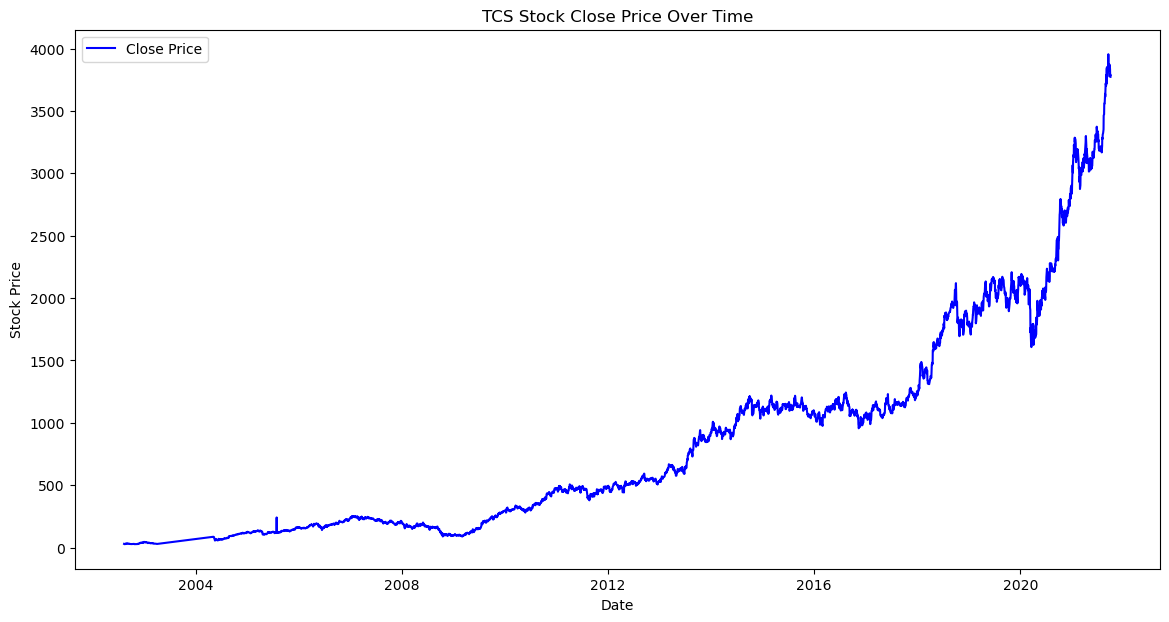

In [10]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date'
        )
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

In [11]:
# Calculating 50-day and 200-day moving averages

data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()


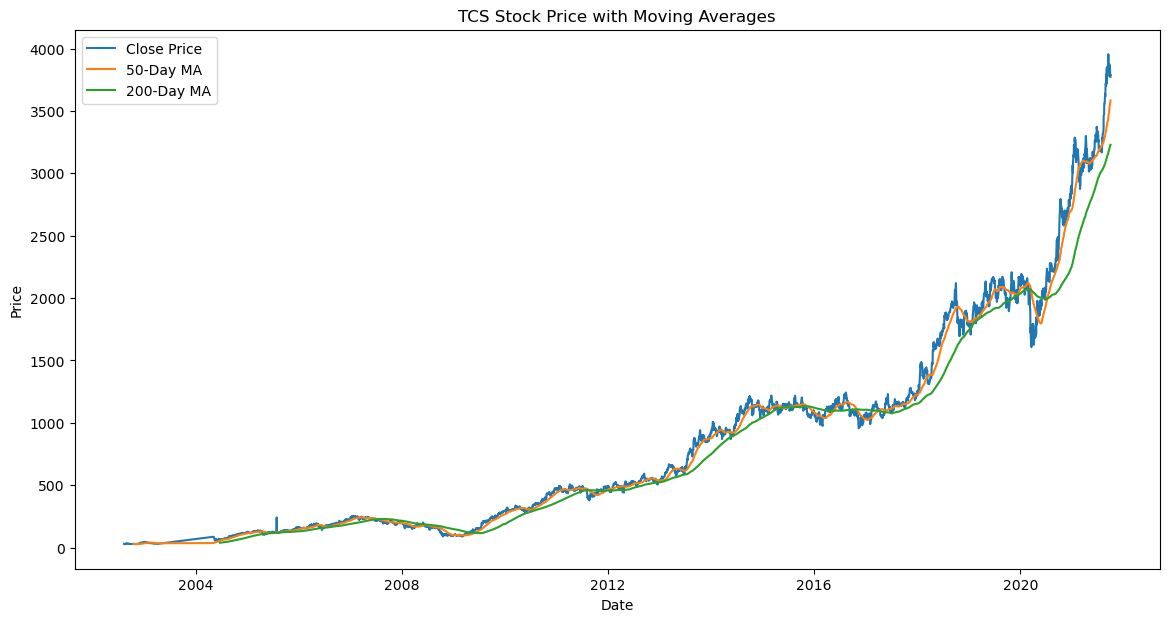

In [12]:
# Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [13]:
# Feature Engineering   STEP - 5
# ● Extract features like Year, Month, Day, Day of Week from Date.
# ● Create lag features (e.g., previous day’s close, previous day’s high/low).

In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

In [16]:
# Lag Features
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True) # Drop rows with NaN values from shifting


In [17]:
# Model Building and Prediction  STEP - ^
# ● Use Linear Regression to predict the Close price based on features.
# ● Train/Test Split for model evaluation.

In [18]:
# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y = data['Close']


In [19]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [20]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.049929985255226
R-Squared Score: 0.9999438356582192


In [23]:
# Visualize Model Performance  STEP - 7
# ● Plot predicted vs. actual values.
# ● Scatter plot to observe prediction accuracy.

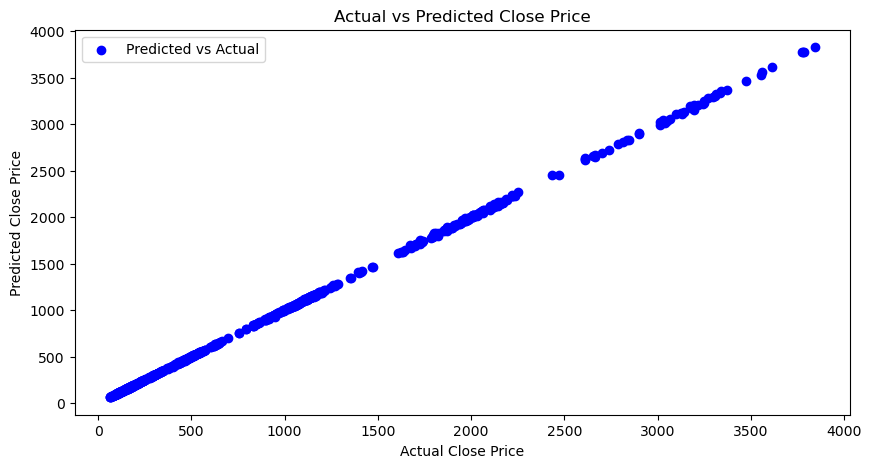

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [25]:
# Save the Model STEP - 8
# ● Save the trained model for future use.

In [26]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
 pickle.dump(model, file)

In [27]:
# Future Work & Interpretation  STEP - 9
# ● Test different models (Random Forest, XGBoost).
# ● Use hyperparameter tuning for optimization.
# ● Explore time-series models like ARIMA for better predictions based on temporal
# data.

In [28]:
# Explanation Summary
# This project covers EDA, visualization, feature engineering, and prediction modeling
# for TCS stock prices:
# 1. EDA provides insights into the stock's historical patterns.
# 2. Moving Averages help smooth out price trends.
# 3. Linear Regression is used to predict closing prices.
# 4. Evaluation metrics help validate the model’s accuracy, giving insight into its
# reliability.

In [29]:
# PART - 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
df = pd.read_csv('TCS_stock_history.csv')  # if it's in the same folder as your notebook
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [31]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [34]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [35]:
corel=df.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [36]:
# Correlation of features with the target variable (Close Price)
correlation_with_close =df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


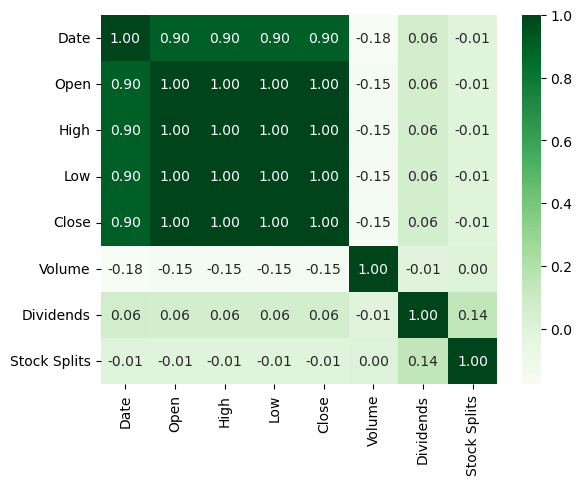

In [37]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

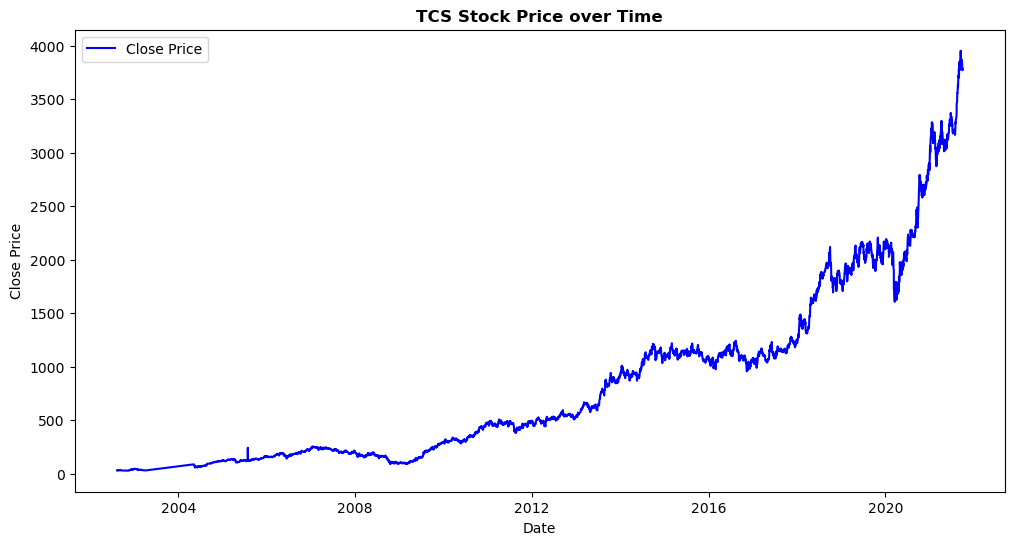

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

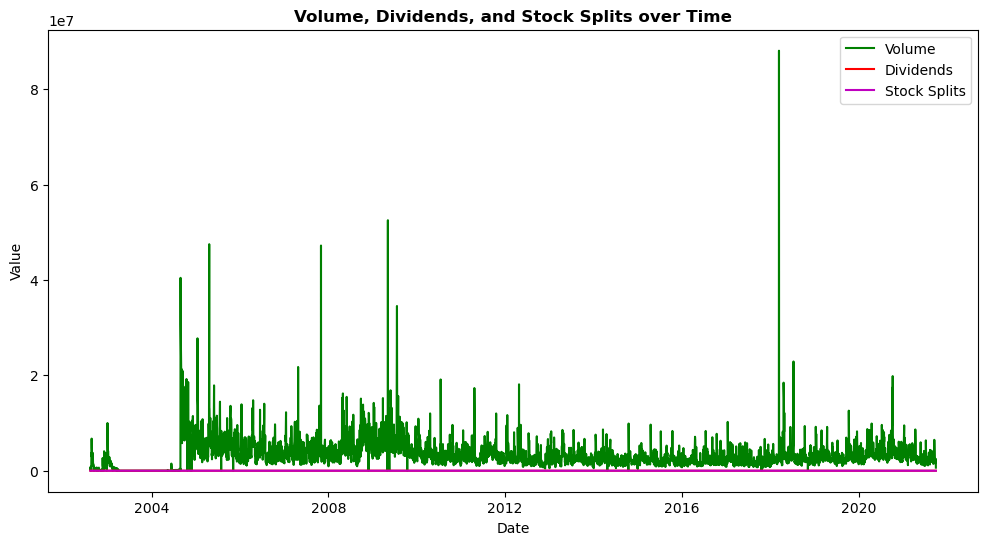

In [39]:
# Volume, Dividends, Stock Splits
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends',
color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits',
color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

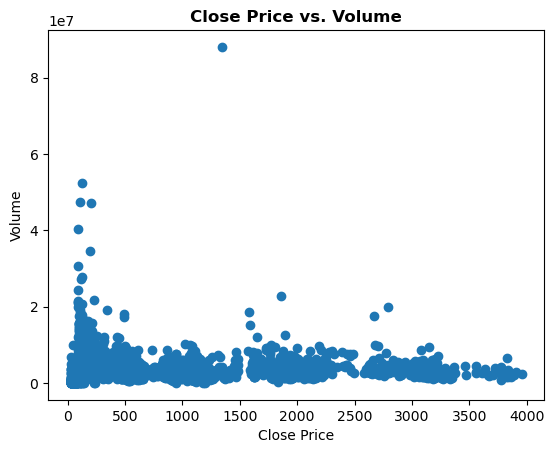

In [40]:
# Close vs Volume
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

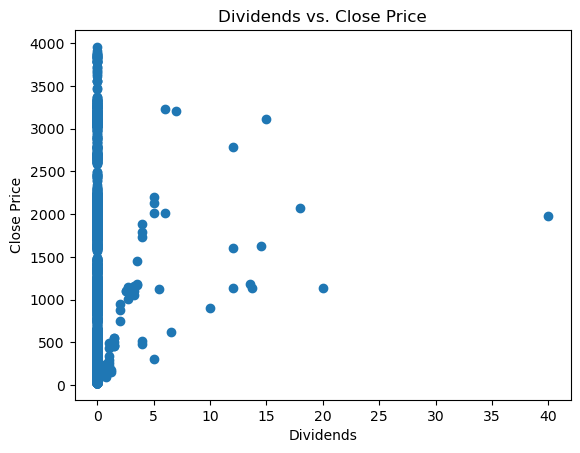

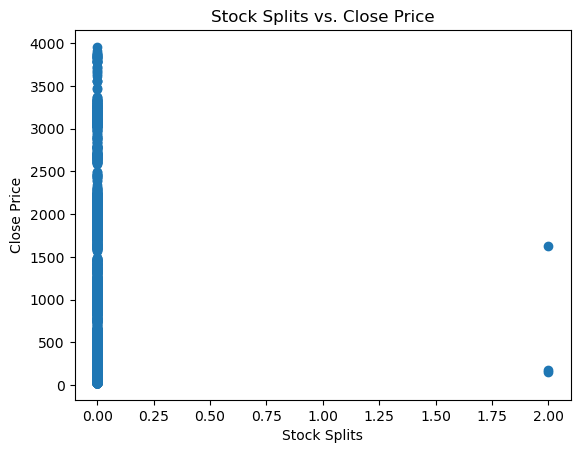

In [42]:
# Dividends and Stock Splits
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

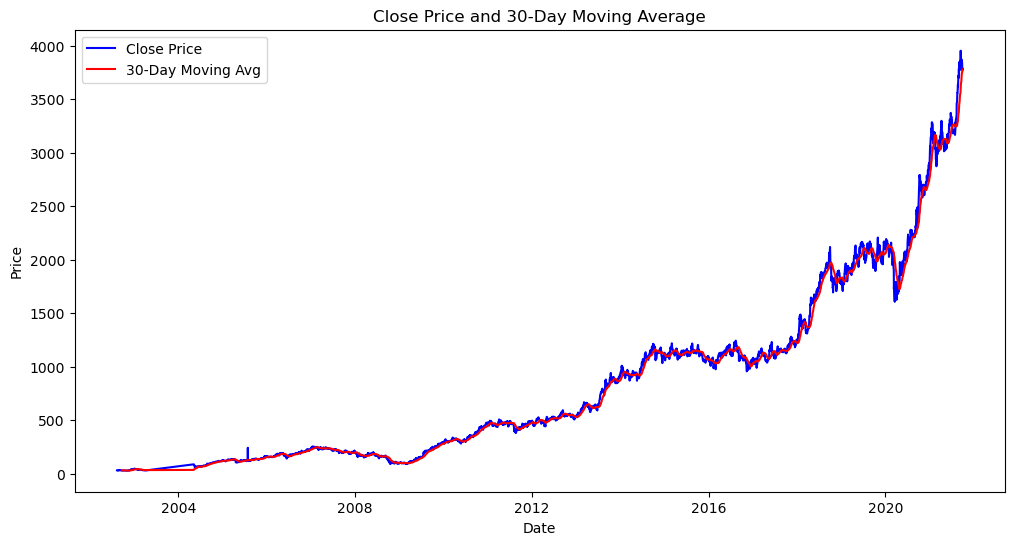

In [44]:
# Moving Averages

df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

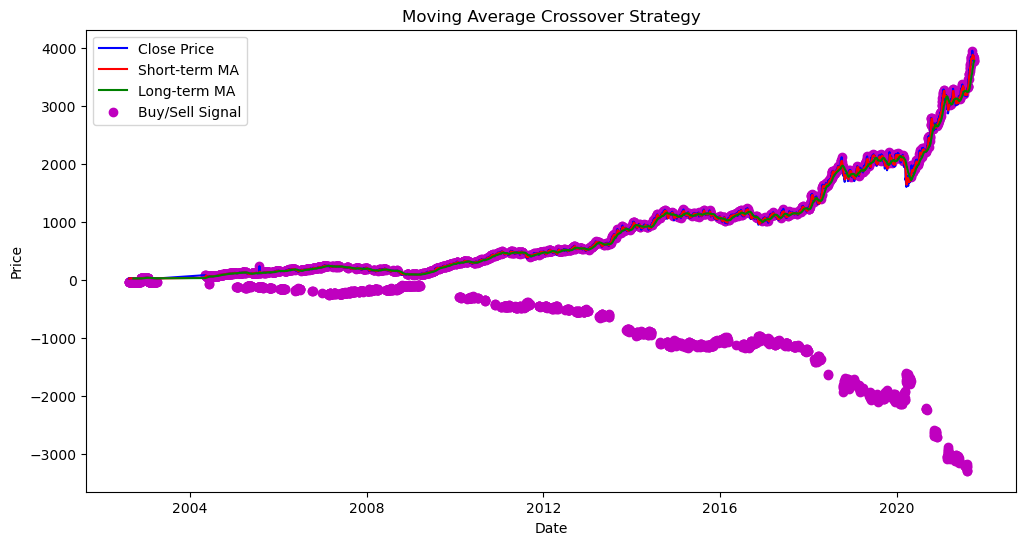

In [45]:
# Moving Average Crossover Strategy

df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers

df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

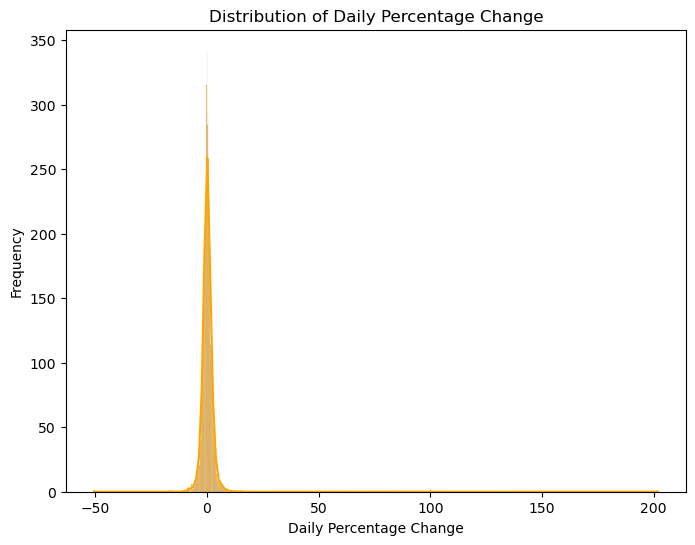

In [46]:
# Daily Price Change

df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change

plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [47]:
# Feature Engineering

df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [48]:
# Modelling

df.shape

(4463, 14)

In [50]:
# Data Preparation & Normalization

# Prepare the data for LSTM

X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data

test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction

X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [51]:
# Reshaping Data

# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [52]:
# Building a LSTM Model

model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size

epochs = 30
batch_size = 15

# Train the model with tqdm progress bar

for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size): X_batch = X_train_lstm[i:i+batch_size] 
    y_batch = y_train_lstm[i:i+batch_size] 
    
    model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction

X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.69it/s]


In [53]:
# Predictions using LSTM

lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 [==============================] - 1s 5ms/step


In [54]:
# Inverse transform of the predictions

lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

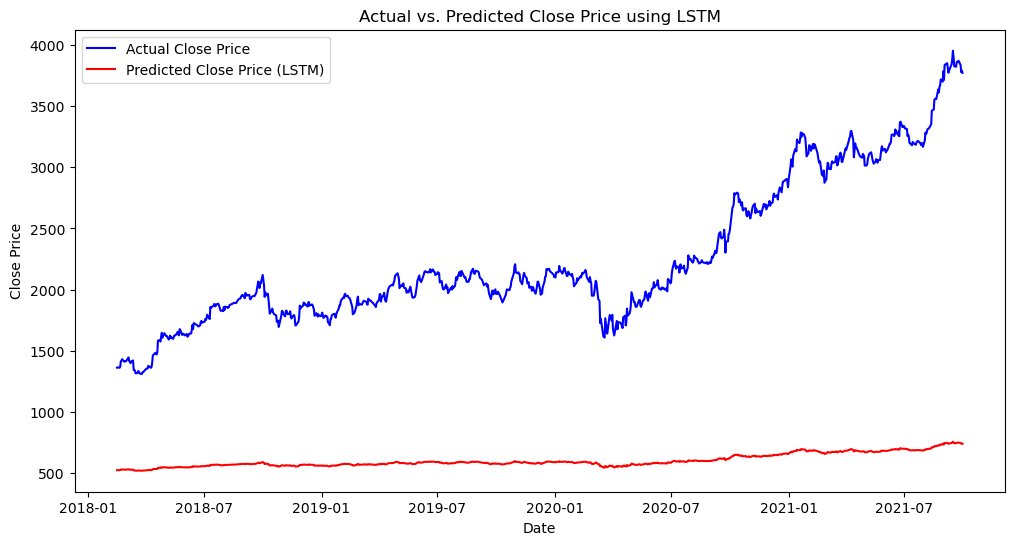

In [55]:
# Visualization of LSTM predictions

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [56]:
# Mean Absolute Error

lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 1656.8710629587217


In [57]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,'Predicted_Close': lstm_predictions.flatten()})

In [58]:
predictions_df.to_csv('predictions.csv', index=False)

In [59]:
# Summary of Improvements

# 1 - Clean & preprocess data properly.

# 2 - Handle feature correlation via PCA or advanced models.

# 3 - Treat it as a time-series forecasting problem, not just regression.

# 4 - Evaluate with financial metrics (MAPE, directional accuracy).

# 5 - Experiment with ARIMA, Prophet, XGBoost, and improved LSTM/GRU models.

# 6 - Build a deployment pipeline for real-world use.

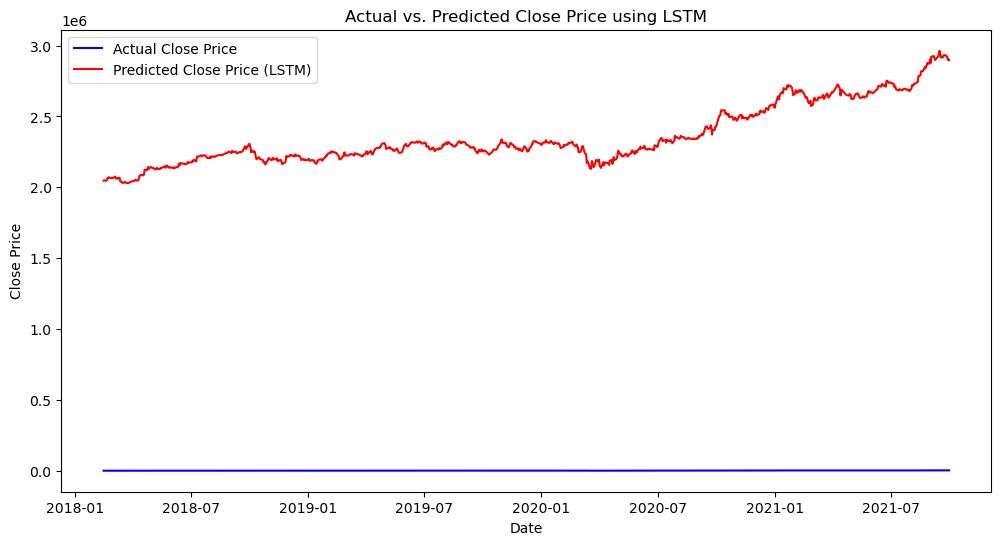

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


28/28 [==============================] - 2s 5ms/step


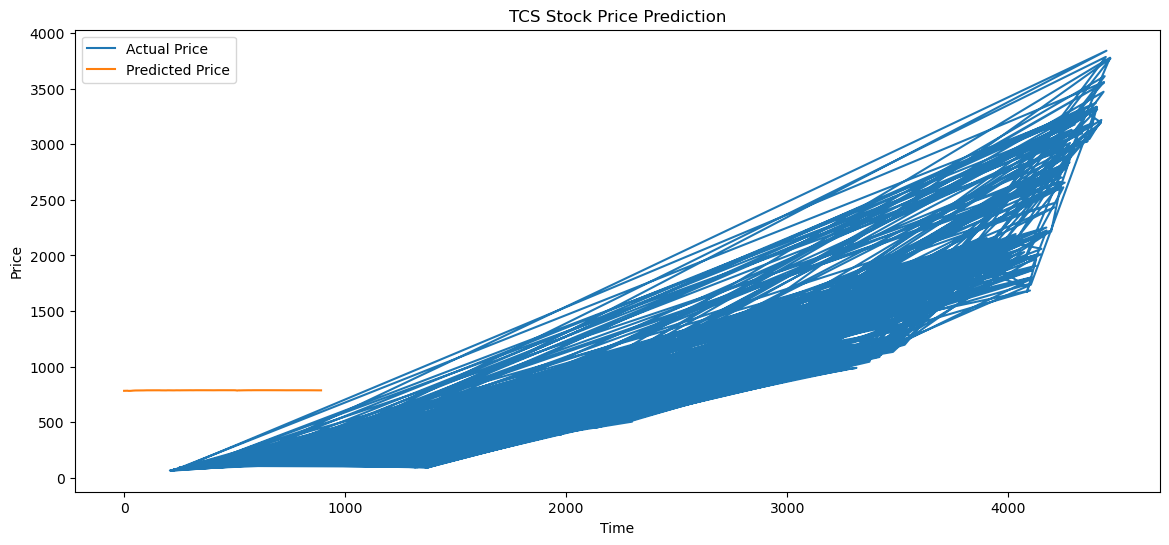

Mean Absolute Error: 655.56


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. Build the model
m = Sequential()
m.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
m.add(LSTM(50))
m.add(Dense(1))

# 2. Compile the model
m.compile(optimizer='adam', loss='mean_squared_error')

# 3. Train the model
min_len = min(len(X_train), len(y_train))
X_train = X_train[:min_len]
y_train = y_train[:min_len]

# 4. Make predictions
predictions = m.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = y_test

# 5. Plot results
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 6. Evaluate performance
min_len = min(len(y_test_actual), len(predictions))
mae = mean_absolute_error(y_test_actual[:min_len].ravel(), predictions[:min_len].ravel())

print(f'Mean Absolute Error: {mae:.2f}')


In [74]:
#THANK YOU 
#REGARDS 
#HARSH PURSNANI
#UMID12082554865
